In [1]:
%matplotlib notebook
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
input_path = os.path.join("..","Clean_Data")
output_path = os.path.join("..","Graphs")
min_games_played = 20

In [3]:
complete_df = pd.read_csv(input_path +'/total_players.csv')
display(complete_df)

,playerId,nameFull,position,draftTeam,gameId,fumbles,interceptions,sacks,#players-pos-league,#games-pos-league,#fumbles-pos-league,#int-pos-league,#sacks-pos-league
0,20130105.0,Duke Williams,S,BUF,42.0,NaN,2.0,NaN,510.0,37222.0,136.0,2569.0,1044.0
1,20140073.0,Preston Brown,LB,BUF,135.0,NaN,2.0,NaN,1110.0,57793.0,37.0,1119.0,6253.0
2,20110847.0,Corbin Bryant,DE,BUF,43.0,NaN,NaN,10.0,749.0,49751.0,2.0,254.0,11289.0
3,20110818.0,Mario Butler,DB,BUF,6.0,NaN,NaN,NaN,1377.0,69831.0,354.0,4596.0,1065.0
4,20090182.0,Jarius Wynn,DE,BUF,32.0,NaN,NaN,8.0,749.0,49751.0,2.0,254.0,11289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,20130054.0,Jamar Taylor,DB,ATL,174.0,NaN,2.0,4.0,1377.0,69831.0,354.0,4596.0,1065.0
4844,20130057.0,D.J. Swearinger,S,NO,145.0,1.0,20.0,6.0,510.0,37222.0,136.0,2569.0,1044.0
4845,20170118.0,Mack Hollins,WR,MIA,2.0,NaN,NaN,NaN,44.0,422.0,121.0,24.0,0.0
4846,20170172.0,Isaiah McKenzie,WR,BUF,2.0,10.0,NaN,NaN,44.0,422.0,121.0,24.0,0.0


In [4]:
players_stats = complete_df[['playerId','nameFull','position','draftTeam','gameId','fumbles','interceptions','sacks']]
players_stats['avg_player_fumbles']=players_stats['fumbles']/players_stats['gameId']
players_stats['avg_player_interceptions']=players_stats['interceptions']/players_stats['gameId']
players_stats['avg_player_sacks']=players_stats['sacks']/players_stats['gameId']
players_stats = players_stats[['playerId','nameFull','position','draftTeam','gameId','avg_player_fumbles','avg_player_interceptions','avg_player_sacks']]
players_stats = players_stats.rename(columns={'gameId':'games_played','draftTeam':'Team'})
players_stats = players_stats.dropna(how="all")
players_stats = players_stats.dropna(how='all').drop_duplicates(subset='nameFull',keep='last').sort_values(by='avg_player_fumbles',ascending=False)
display(players_stats)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,playerId,nameFull,position,Team,games_played,avg_player_fumbles,avg_player_interceptions,avg_player_sacks
4846,20170172.0,Isaiah McKenzie,WR,BUF,2.0,5.00,NaN,NaN
4666,20150054.0,Ameer Abdullah,RB,MIN,2.0,5.00,NaN,NaN
3802,20140189.0,T.J. Jones,WR,NYG,2.0,5.00,NaN,NaN
1636,20130027.0,DeAndre Hopkins,WR,HST,3.0,3.00,NaN,NaN
3340,20110004.0,A.J. Green,WR,CIN,4.0,2.75,NaN,NaN
...,...,...,...,...,...,...,...,...
4841,20160202.0,Anthony Zettel,DT,SF,92.0,NaN,NaN,0.271739
4842,20180179.0,Parry Nickerson,DB,JAX,10.0,NaN,NaN,NaN
4843,20130054.0,Jamar Taylor,DB,ATL,174.0,NaN,0.011494,0.022989
4845,20170118.0,Mack Hollins,WR,MIA,2.0,NaN,NaN,NaN


In [5]:
by_team_graphs = players_stats[players_stats['games_played']>=min_games_played]
by_team_graphs = by_team_graphs.groupby('Team').mean().reset_index()
by_team_graphs = by_team_graphs[['Team','avg_player_fumbles','avg_player_interceptions','avg_player_sacks']]
by_team_graphs['total_avg_player_plays'] = by_team_graphs['avg_player_fumbles'].fillna(0) + by_team_graphs['avg_player_interceptions'].fillna(0) + by_team_graphs['avg_player_sacks'].fillna(0)
avg_league_interceptions = by_team_graphs['avg_player_interceptions'].mean()
avg_league_fumbles = by_team_graphs['avg_player_fumbles'].mean()
avg_league_sacks = by_team_graphs['avg_player_sacks'].mean()
by_team_graphs['avg_league_fumbles'] = avg_league_fumbles
by_team_graphs['avg_league_interceptions'] = avg_league_interceptions
by_team_graphs['avg_league_sacks'] = avg_league_sacks
by_team_graphs['total_avg_league_plays'] = by_team_graphs['avg_league_fumbles'] + by_team_graphs['avg_league_interceptions'] + by_team_graphs['avg_league_sacks']
display(by_team_graphs.sort_values(by='avg_player_fumbles',ascending=False))
by_team_graphs.to_csv("../../by_team_graphs.csv",index=False,header=True)

,Team,avg_player_fumbles,avg_player_interceptions,avg_player_sacks,total_avg_player_plays,avg_league_fumbles,avg_league_interceptions,avg_league_sacks,total_avg_league_plays
21,MIN,0.219274,0.083438,0.193967,0.496679,0.035086,0.082771,0.157315,0.275172
10,DET,0.085284,0.105274,0.176373,0.366931,0.035086,0.082771,0.157315,0.275172
2,BAL,0.071591,0.060663,0.066035,0.198290,0.035086,0.082771,0.157315,0.275172
3,BUF,0.063995,0.098298,0.155081,0.317375,0.035086,0.082771,0.157315,0.275172
24,NYG,0.040624,0.079368,0.142621,0.262613,0.035086,0.082771,0.157315,0.275172
29,SF,0.040232,0.093809,0.238151,0.372193,0.035086,0.082771,0.157315,0.275172
4,CAR,0.038462,0.100487,0.241610,0.380558,0.035086,0.082771,0.157315,0.275172
28,SEA,0.034947,0.074020,0.146266,0.255233,0.035086,0.082771,0.157315,0.275172
18,LAC,0.033780,0.049797,0.100845,0.184422,0.035086,0.082771,0.157315,0.275172
9,DEN,0.030881,0.084823,0.157765,0.273469,0.035086,0.082771,0.157315,0.275172


<IPython.core.display.Javascript object>


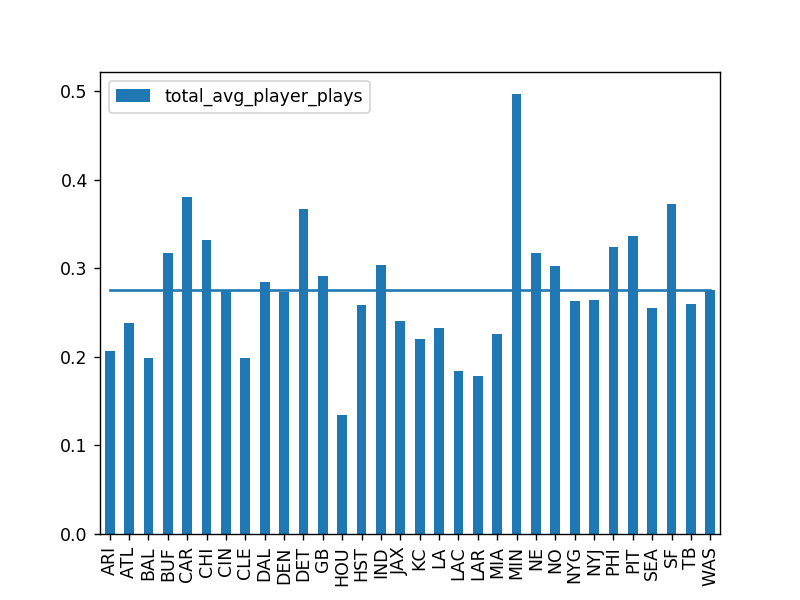

In [6]:
width=0.5
by_team_graphs[['total_avg_player_plays']].plot(kind='bar', width =width)
by_team_graphs['total_avg_league_plays'].plot()

ax = plt.gca()
plt.xlim([-width, len(by_team_graphs['Team'])-width])
ax.set_xticklabels(by_team_graphs['Team'],rotation=90)
plt.show()

<IPython.core.display.Javascript object>


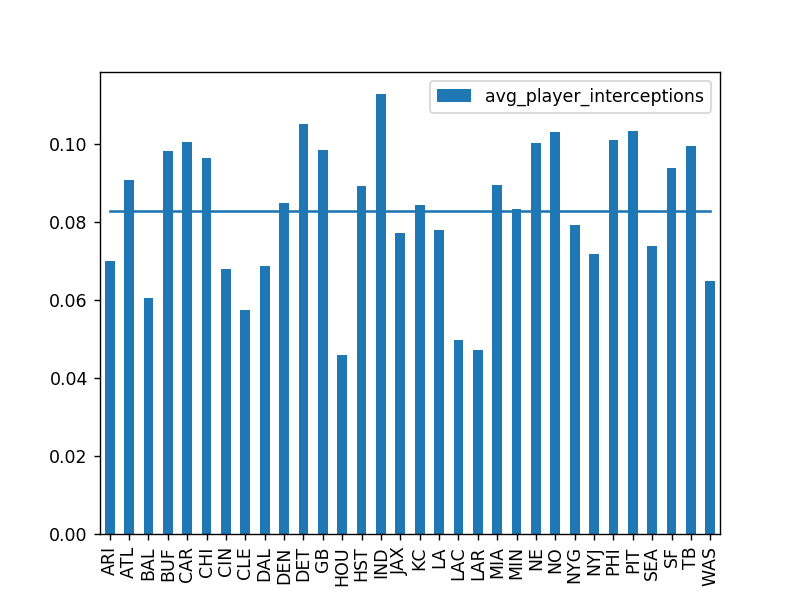

In [7]:
width=0.5
by_team_graphs[['avg_player_interceptions']].plot(kind='bar', width =width)
by_team_graphs['avg_league_interceptions'].plot()

ax = plt.gca()
plt.xlim([-width, len(by_team_graphs['Team'])-width])
ax.set_xticklabels(by_team_graphs['Team'],rotation=90)
plt.show()

<IPython.core.display.Javascript object>


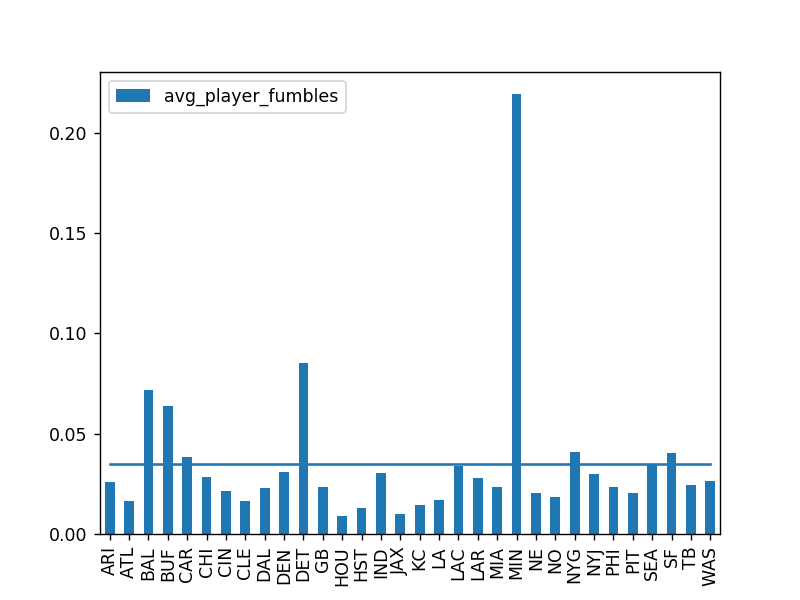

In [8]:
width=0.5
by_team_graphs[['avg_player_fumbles']].plot(kind='bar', width =width)
by_team_graphs['avg_league_fumbles'].plot()

ax = plt.gca()
plt.xlim([-width, len(by_team_graphs['Team'])-width])
ax.set_xticklabels(by_team_graphs['Team'],rotation=90)
plt.show()

<IPython.core.display.Javascript object>


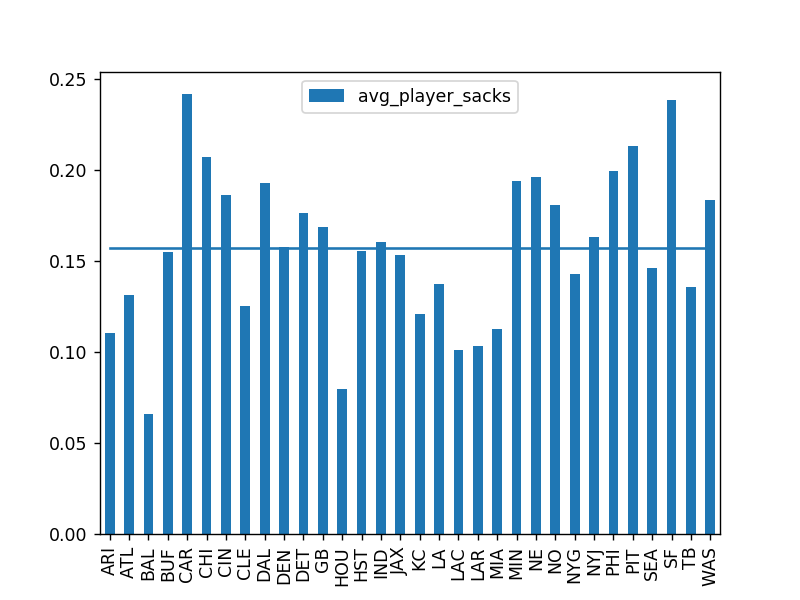

In [9]:
width=0.5
by_team_graphs[['avg_player_sacks']].plot(kind='bar', width =width)
by_team_graphs['avg_league_sacks'].plot()

ax = plt.gca()
plt.xlim([-width, len(by_team_graphs['Team'])-width])
ax.set_xticklabels(by_team_graphs['Team'],rotation=90)
plt.show()